Athlete_ID                  0
Age                         0
Gender                      0
Height_cm                   0
Weight_kg                   0
Position                    0
Training_Intensity          0
Training_Hours_Per_Week     0
Recovery_Days_Per_Week      0
Match_Count_Per_Week        0
Rest_Between_Events_Days    0
Fatigue_Score               0
Performance_Score           0
Team_Contribution_Score     0
Load_Balance_Score          0
ACL_Risk_Score              0
Injury_Indicator            0
dtype: int64


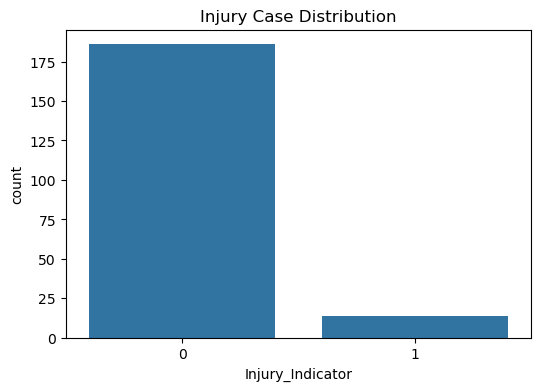

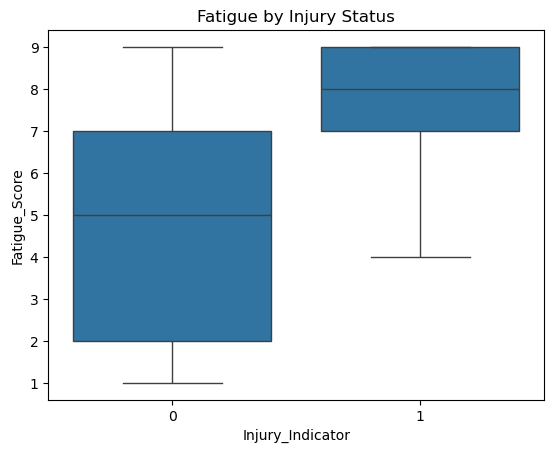

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        37
           1       0.00      0.00      0.00         3

    accuracy                           0.93        40
   macro avg       0.46      0.50      0.48        40
weighted avg       0.86      0.93      0.89        40

Confusion Matrix:
[[37  0]
 [ 3  0]]
ROC AUC Score: 0.9324324324324325


C:\Users\KAJAL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\KAJAL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\KAJAL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [6]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import streamlit as st

# 2. Load Data
df = pd.read_csv('collegiate_athlete_injury_dataset.csv')
df.columns = [col.strip() for col in df.columns]  # Remove accidental spaces

# 3. Data Cleaning
# Check for null values
print(df.isnull().sum())
df.describe()
# Drop rows/columns with excessive missingness if needed (here, there are none)
# Convert categorical variables
for col in ['Gender', 'Position']:
    df[col] = df[col].astype('category')
# You may encode these for modeling:
le_gender = LabelEncoder()
le_position = LabelEncoder()
df['Gender_num'] = le_gender.fit_transform(df['Gender'])
df['Position_num'] = le_position.fit_transform(df['Position'])

# 4. Exploratory Data Analysis (Visualization)
# Injury Indicator Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Injury_Indicator', data=df)
plt.title('Injury Case Distribution')
plt.show()


# Example: Compare fatigue/frequency by injury
sns.boxplot(x='Injury_Indicator', y='Fatigue_Score', data=df)
plt.title('Fatigue by Injury Status')
plt.show()

# 5. Feature Engineering
features = ['Age','Height_cm','Weight_kg','Training_Intensity','Training_Hours_Per_Week',
            'Recovery_Days_Per_Week','Match_Count_Per_Week','Rest_Between_Events_Days',
            'Fatigue_Score','Performance_Score','Team_Contribution_Score',
            'Load_Balance_Score','ACL_Risk_Score','Gender_num','Position_num']
X = df[features]
y = df['Injury_Indicator']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# 7. Model Building
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 8. Model Evaluation
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

# 9. Streamlit App (save to app.py for deployment, executable via `streamlit run app.py`)
# Paste below block into a separate file if needed!

import streamlit as st
st.title('Athlete Injury Risk Prediction')
st.write('Upload your athlete data and get injury risk predictions!')

uploaded_file = st.file_uploader("Choose CSV file", type="csv")
if uploaded_file is not None:
    input_df = pd.read_csv(uploaded_file)
    for col in ['Gender', 'Position']:
        input_df[col] = input_df[col].astype('category')
    input_df['Gender_num'] = le_gender.transform(input_df['Gender'])
    input_df['Position_num'] = le_position.transform(input_df['Position'])
    X_input = input_df[features]
    X_input_scaled = scaler.transform(X_input)
    risk_pred = model.predict(X_input_scaled)
    input_df['Injury_Risk_Prediction'] = risk_pred
    st.write(input_df)

st.write('This tool uses machine learning with athlete health and workload features.')
